In [1]:
from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pandas as pd
import pyprojroot
import seaborn as sns

import vak

In [2]:
# specify the custom font to use
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'arial'

In [3]:
REPO_ROOT = pyprojroot.here()
BFSONGREPO_RESULTS_ROOT = REPO_ROOT.joinpath('results/BFSongRepository').expanduser().resolve()
ERROR_ACROSS_DAYS_CSV_PATH = BFSONGREPO_RESULTS_ROOT.joinpath('error_across_days.csv')

In [4]:
data = pd.read_csv(ERROR_ACROSS_DAYS_CSV_PATH)

### figure

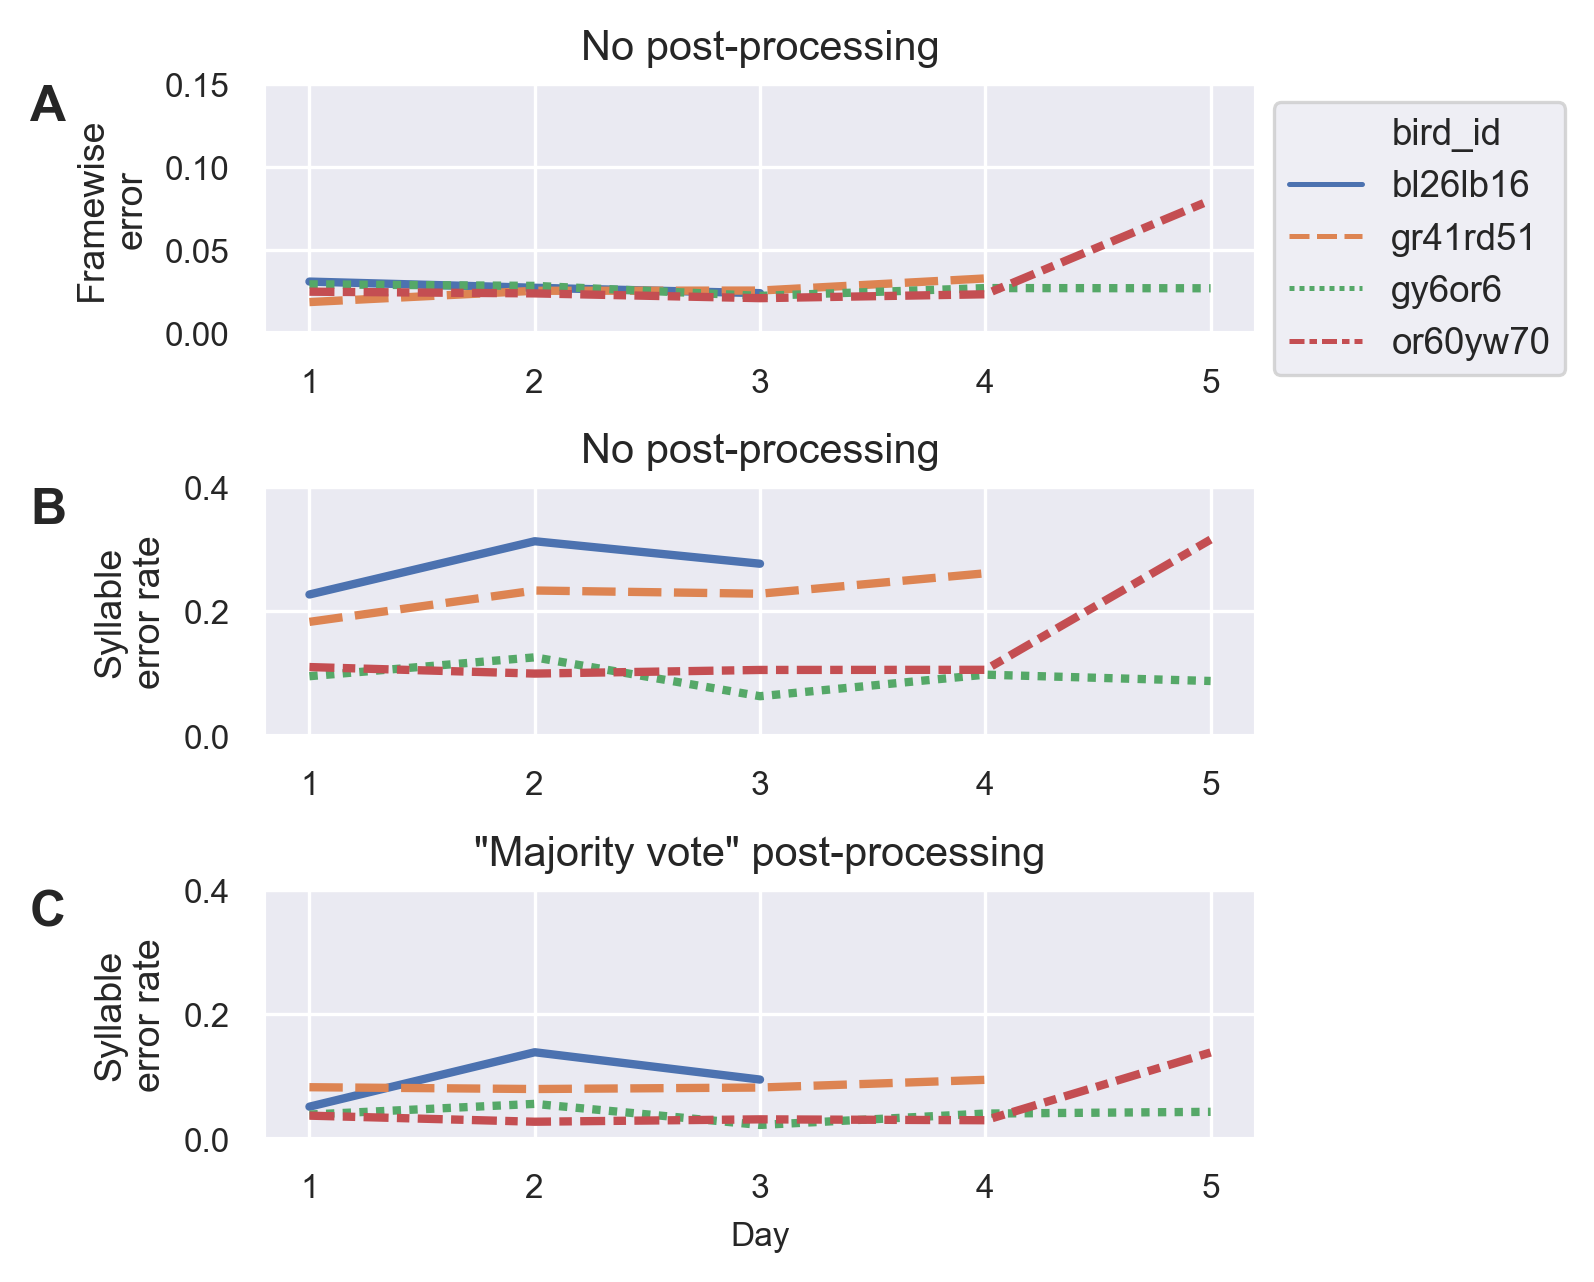

In [5]:
SAVE_FIG = True

sns.set("paper")

bird_ids = data['bird_id'].unique()
n_bird_ids = len(bird_ids)

# only show metrics for days up to and including MAX_DAY
MAX_DAY = 5

ERR_METRICS = [
         'err',
]

SEG_ERR_RATE_METRICS = [
    'segment_error_rate',
    'segment_error_rate_majority_vote'
]

METRIC_LISTS = (*ERR_METRICS, 
                *SEG_ERR_RATE_METRICS,
                # ['test_set_duration']
               )

nrows, ncols = len(METRIC_LISTS), 1
FIGSIZE = (5.2, 4.16)
DPI = 300

fig = plt.figure(constrained_layout=True, figsize=FIGSIZE, dpi=DPI)
widths = [1]
heights = [1, 1, 1]
spec = fig.add_gridspec(ncols=ncols, nrows=nrows, width_ratios=widths, height_ratios=heights)

ax = []
for row, height in enumerate(heights):
    for col, width in enumerate(widths):
        ax.append(
            fig.add_subplot(spec[row, col])
        )

for ax_ in ax:
    ax_.tick_params(labelsize=8)
ax = np.array(ax)

for ax_ind, metric in enumerate(METRIC_LISTS):   
    metric_data = data[data['day'] <= MAX_DAY]

    if metric != 'test_set_duration':
        y_name = f'mean_{metric}'
    else:
        y_name = metric

    if ax_ind == 0:
        legend = 'full'
    else:
        legend = False

    sns.lineplot(x='day', y=y_name, data=metric_data, hue='bird_id', ax=ax[ax_ind], legend=legend, linewidth=2, style='bird_id')
    ax[ax_ind].set_ylabel('')
    ax[ax_ind].xaxis.set_major_locator(MaxNLocator(integer=True))

    if ax_ind == 2:
        ax[ax_ind].set_xlabel('Day', fontsize=8)
    else:
        ax[ax_ind].set_xlabel('')

ax[0].set_ylim([0., 0.15])
ax[1].set_ylim([0., 0.4])
ax[2].set_ylim([0., 0.4])
    
ax[0].set_ylabel('Framewise\nerror', fontsize=9)
ax[0].set_title('No post-processing', fontsize=10)
ax[1].set_ylabel('Syllable\nerror rate', fontsize=9)
ax[1].set_title('No post-processing', fontsize=10)
ax[2].set_ylabel('Syllable\nerror rate', fontsize=9)
ax[2].set_title('"Majority vote" post-processing', fontsize=10)

# get handles from lower right axes legend, then remove and re-create outside
handles, _ = ax[0].get_legend_handles_labels()
ax[0].get_legend().remove()
ax[0].legend(handles=handles, bbox_to_anchor=(1, 1))

panel_labels = ['A', 'B', 'C']
for panel_label, ax_ in zip(panel_labels, ax):
    ax_.text(-0.2, 1., panel_label, transform=ax_.transAxes,
          fontsize=12, fontweight='bold', va='top', ha='right')

if SAVE_FIG:
    plt.savefig(
        REPO_ROOT.joinpath('doc/article/figures/fig5/fig5-error-across-days.png')
    )
    plt.savefig(
        REPO_ROOT.joinpath('doc/article/figures/fig5/fig5-error-across-days.svg')
    )
    plt.savefig(
        REPO_ROOT.joinpath('doc/article/figures/fig5/fig5-error-across-days.tiff')
    )